In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
dataset = pd.read_csv("C:/Users/Sony/Desktop/Data-Science-Training/5. Classification/Social_Network_Ads.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
dataset.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [5]:
# X - Indepedent Variable
X = dataset.iloc[ : , :-1 ]
# X = dataset.iloc[ : , 0 : 2 ]


In [6]:
X.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [7]:
y = dataset.iloc[ : , 2:3 ]

In [8]:
y.head()

Purchased
0          0
1          0
2          0
3          0
4          0

In [9]:
# Divide my dataset into Training and Test 80:20 split
# Import the Libraries to perform the split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [11]:
X_test.shape

(80, 2)

In [12]:
y_test.shape

(80, 1)

In [13]:
X_train.head()

Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000

#### Feature Scaling
It is not required for Linear Regression
It is required for Logistic Regression

In [14]:
from sklearn.preprocessing import StandardScaler 
# Standard Scaler : subtract mean / divide by Std deviation

In [15]:
X_stdscalaer = StandardScaler()

In [16]:
X_stdscalaer.fit(X_train) # Calculating mean, std variation

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_scaled = X_stdscalaer.transform(X_train)

In [18]:
pd.DataFrame(X_train_scaled).head()

0         1
0  1.922950  2.146016
1  2.020161  0.378719
2 -1.382215 -0.432499
3 -1.187794 -1.011940
4  1.922950 -0.925024

In [19]:
X_test.head()

Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000

In [20]:
# For Test Data, always use the train data standard scaler object
X_test_scaled = X_stdscalaer.transform(X_test)

In [21]:
pd.DataFrame(X_test_scaled).head()

0         1
0 -0.798951  0.494608
1 -0.021265 -0.577359
2 -0.312897  0.146943
3 -0.798951  0.262831
4 -0.312897 -0.577359

### Build a Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
classifier = LogisticRegression()

In [24]:
# Train the model using Training set
classifier.fit(X_train_scaled, y_train)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Predict the output
# Using Test sett
y_pred = classifier.predict(X_test_scaled)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [38]:
y_prob = classifier.predict_proba(X_test_scaled)

In [39]:
y_prob

array([[0.87397564, 0.12602436],
       [0.82308938, 0.17691062],
       [0.7922792 , 0.2077208 ],
       [0.89908521, 0.10091479],
       [0.89298557, 0.10701443],
       [0.99023273, 0.00976727],
       [0.98195302, 0.01804698],
       [0.26565508, 0.73434492],
       [0.99237235, 0.00762765],
       [0.50101722, 0.49898278],
       [0.95797539, 0.04202461],
       [0.96538137, 0.03461863],
       [0.82857642, 0.17142358],
       [0.62179463, 0.37820537],
       [0.98045278, 0.01954722],
       [0.64740551, 0.35259449],
       [0.70819428, 0.29180572],
       [0.98434561, 0.01565439],
       [0.01367777, 0.98632223],
       [0.95250365, 0.04749635],
       [0.90163753, 0.09836247],
       [0.04074602, 0.95925398],
       [0.71543276, 0.28456724],
       [0.12592356, 0.87407644],
       [0.9942185 , 0.0057815 ],
       [0.03064062, 0.96935938],
       [0.91101041, 0.08898959],
       [0.91297513, 0.08702487],
       [0.79516794, 0.20483206],
       [0.82898276, 0.17101724],
       [0.

In [29]:
y_log_prob = classifier.predict_log_proba(X_test)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1681: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


In [30]:
y_log_prob

array([[-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,   0.],
       [-inf,

In [ ]:
### Let us Visualize this using the Graph
# On the Training data
from matplotlib.colors import ListedColormap
#Data set
X_set, y_set = X_stdscalaer.inverse_transform(X_train_scaled), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(X_stdscalaer.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [42]:
pd.DataFrame(X_stdscalaer.inverse_transform(X_train_scaled))

0         1
0    58.0  144000.0
1    59.0   83000.0
2    24.0   55000.0
3    26.0   35000.0
4    58.0   38000.0
..    ...       ...
315  48.0   30000.0
316  29.0   43000.0
317  36.0   52000.0
318  27.0   54000.0
319  26.0  118000.0

[320 rows x 2 columns]

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[57,  1],
       [ 5, 17]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred) * 100

92.5

# Model Evaluation using other Criteria

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Calcualte the Precision, Recall and F1 Score, we use Classification Report

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



## Draw ROC - AUC graph

In [37]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [40]:
y_prob

array([[0.87397564, 0.12602436],
       [0.82308938, 0.17691062],
       [0.7922792 , 0.2077208 ],
       [0.89908521, 0.10091479],
       [0.89298557, 0.10701443],
       [0.99023273, 0.00976727],
       [0.98195302, 0.01804698],
       [0.26565508, 0.73434492],
       [0.99237235, 0.00762765],
       [0.50101722, 0.49898278],
       [0.95797539, 0.04202461],
       [0.96538137, 0.03461863],
       [0.82857642, 0.17142358],
       [0.62179463, 0.37820537],
       [0.98045278, 0.01954722],
       [0.64740551, 0.35259449],
       [0.70819428, 0.29180572],
       [0.98434561, 0.01565439],
       [0.01367777, 0.98632223],
       [0.95250365, 0.04749635],
       [0.90163753, 0.09836247],
       [0.04074602, 0.95925398],
       [0.71543276, 0.28456724],
       [0.12592356, 0.87407644],
       [0.9942185 , 0.0057815 ],
       [0.03064062, 0.96935938],
       [0.91101041, 0.08898959],
       [0.91297513, 0.08702487],
       [0.79516794, 0.20483206],
       [0.82898276, 0.17101724],
       [0.

In [41]:
y_prob = y_prob[ :, 1]

In [42]:
y_prob

array([0.12602436, 0.17691062, 0.2077208 , 0.10091479, 0.10701443,
       0.00976727, 0.01804698, 0.73434492, 0.00762765, 0.49898278,
       0.04202461, 0.03461863, 0.17142358, 0.37820537, 0.01954722,
       0.35259449, 0.29180572, 0.01565439, 0.98632223, 0.04749635,
       0.09836247, 0.95925398, 0.28456724, 0.87407644, 0.0057815 ,
       0.96935938, 0.08898959, 0.08702487, 0.20483206, 0.17101724,
       0.0251403 , 0.3049154 , 0.92241231, 0.1627098 , 0.01775628,
       0.00463549, 0.02454726, 0.07340366, 0.03224642, 0.54144973,
       0.07660121, 0.2909855 , 0.06819766, 0.04474186, 0.79863516,
       0.03140396, 0.31159271, 0.9199306 , 0.01098176, 0.84966242,
       0.98807528, 0.0431393 , 0.12983729, 0.43025092, 0.97683953,
       0.32344225, 0.09478441, 0.05046457, 0.47892654, 0.00450605,
       0.02394195, 0.92386732, 0.01185517, 0.40313538, 0.0025003 ,
       0.97768715, 0.04555023, 0.03140396, 0.22410388, 0.46699943,
       0.60486018, 0.21821687, 0.01411947, 0.25900388, 0.07884

In [43]:
from sklearn.metrics import roc_curve

In [45]:
roc_curve(y_test, y_prob) 

(array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
        0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.12068966,
        0.12068966, 0.18965517, 0.18965517, 0.67241379, 0.70689655,
        1.        ]),
 array([0.        , 0.04545455, 0.77272727, 0.77272727, 0.81818182,
        0.81818182, 0.86363636, 0.86363636, 0.90909091, 0.90909091,
        0.95454545, 0.95454545, 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.98807528, 0.98807528, 0.54144973, 0.49898278, 0.47892654,
        0.43025092, 0.40313538, 0.35259449, 0.32344225, 0.31159271,
        0.3049154 , 0.28456724, 0.25900388, 0.03224642, 0.03140396,
        0.0025003 ]))

In [46]:
fper, tper, thresholds = roc_curve(y_test, y_prob)

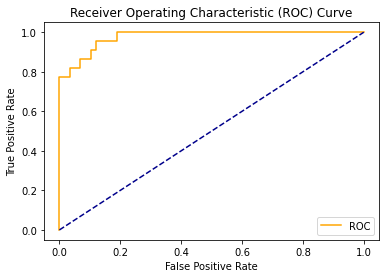

In [49]:
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [50]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [51]:
''' https://www.kaggle.com/ronitf/heart-disease-uci '''

' https://www.kaggle.com/ronitf/heart-disease-uci '

In [52]:
from sklearn.datasets import load_breast_cancer

In [53]:
''' H.W - Try Precision, REcall, F1 score and ROC curve on all the other classification ML models
Try on cancer dataset all the classification technique. '''

' H.W - Try Precision, REcall, F1 score and ROC curve on all the other classification ML models\nTry on cancer dataset all the classification technique. '